<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_11_02_%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 필요 라이브러리 import

In [ ]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
# os에 따른 font 깨짐 제거를 위해 font 지정

import os

if os.name == "nt":
    font_family = "Malgun Gothic"
else: #mac os
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

### 2. 데이터셋 생성

In [ ]:
data = pd.DataFrame(
    {"score1" : [99, 65, 79, 94, 87],
     "score2" : [79, 85, 79, 93, 97],
     "score3" : [59, np.nan, 39, np.nan, np.nan],
     "weight" : [5.43, 0.12, 10.44, 9.33, 4.22],
     "diff" : [-2.1, 5, 2, -5.4, -3.3],
     "place" : ["A", "B", "A", "A", "B"]}
)

### 3. 기술통계

#### 3-1 pandas 함수를 이용한 요약정보
##### describe(): 데이터프레임 컬럼 별 기술통계량을 보여줌
* 수치형: describe()
* 범주형: describe(include = "object")
* 전체변수: describe(include = "all")

In [ ]:
# 데이터프레임 요약정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score1  5 non-null      int64  
 1   score2  5 non-null      int64  
 2   score3  2 non-null      float64
 3   weight  5 non-null      float64
 4   diff    5 non-null      float64
 5   place   5 non-null      object 
dtypes: float64(3), int64(2), object(1)
memory usage: 368.0+ bytes


In [ ]:
display(data.describe(), # 수치형
        data.describe(include = "object"), # 범주형
        data.describe(include = "all")) # 모든 변수

,score1,score2,score3,weight,diff
count,5.00000,5.000000,2.000000,5.000000,5.000000
mean,84.80000,86.600000,49.000000,5.908000,-0.760000
std,13.38656,8.173127,14.142136,4.148128,4.200357
min,65.00000,79.000000,39.000000,0.120000,-5.400000
25%,79.00000,79.000000,44.000000,4.220000,-3.300000
50%,87.00000,85.000000,49.000000,5.430000,-2.100000
75%,94.00000,93.000000,54.000000,9.330000,2.000000
max,99.00000,97.000000,59.000000,10.440000,5.000000


,place
count,5
unique,2
top,A
freq,3


,score1,score2,score3,weight,diff,place
count,5.00000,5.000000,2.000000,5.000000,5.000000,5
unique,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,A
freq,NaN,NaN,NaN,NaN,NaN,3
mean,84.80000,86.600000,49.000000,5.908000,-0.760000,NaN
std,13.38656,8.173127,14.142136,4.148128,4.200357,NaN
min,65.00000,79.000000,39.000000,0.120000,-5.400000,NaN
25%,79.00000,79.000000,44.000000,4.220000,-3.300000,NaN
50%,87.00000,85.000000,49.000000,5.430000,-2.100000,NaN
75%,94.00000,93.000000,54.000000,9.330000,2.000000,NaN


#### 3-2 중심경향치

* mean() : 산술평균
* trim_mean() : 절사평균
* np.average(weight=) : 가중평균
* median() : 중앙값
* mode() : 최빈값

In [ ]:
# 한 변수의 평균
print("한 변수:", data["score1"].mean())

# 데이터프레임 전체 평균
print("전체 평균:","\n", data.mean())

# 절사평균
from scipy.stats import trim_mean
print(trim_mean(data["score2"], 0.1)) #상하단 0.1% 제외한 평균

# 가중평균
np.average(data["score2"], weights = data["weight"])

한 변수: 84.8
전체 평균: 
 score1    84.800
score2    86.600
score3    49.000
weight     5.908
diff      -0.760
dtype: float64
86.6


86.01760324983074

In [ ]:
# 중앙값
# 데이터 갯수 홀수
print(data.score2.median())

# 데이터 갯수 짝수
x = [100, 600, 100, 200, 400, 500]
print(np.median(x))

85.0
300.0


In [ ]:
# 최빈값
data.score2.mode()

0    79
dtype: int64

#### 3-3 산포도

In [ ]:
# 범위
print(data.score2.max() - data.score2.min())

18


In [ ]:
# 분산
print(data.score2.var())

# 표준편차
print(data.score2.std())

66.8
8.17312669668102


In [ ]:
# 사분위수 범위(IQR)
print(data.score2.quantile(0.75) - data.score2.quantile(0.25))

14.0


In [ ]:
# 변동계수(cv = sigma/mu)

cv1 = data.score1.std() / data.score1.mean()
cv2 = data.score2.std() / data.score2.mean()

print("score1 cv : {}".format(round(cv1,3)), "\n",
      "score2 cv : {}".format(round(cv2,3)))

score1 cv : 0.158 
 score2 cv : 0.094


#### 3-4 비대칭도

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# os에 따른 font 깨짐 제거를 위해 font 지정

import os

if os.name == "nt":
    font_family = "Malgun Gothic"
else: #mac os
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [ ]:
pd.Series([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 4, 5]).skew()

1.8119344628051428

In [ ]:
# 왜도
from scipy.stats import skew

skew_list1 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 4, 5]
skew_list2 = [1, 2, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6]

print(skew(skew_list1))
print(skew(skew_list2))

1.6656293067949786
-1.0422210554570965


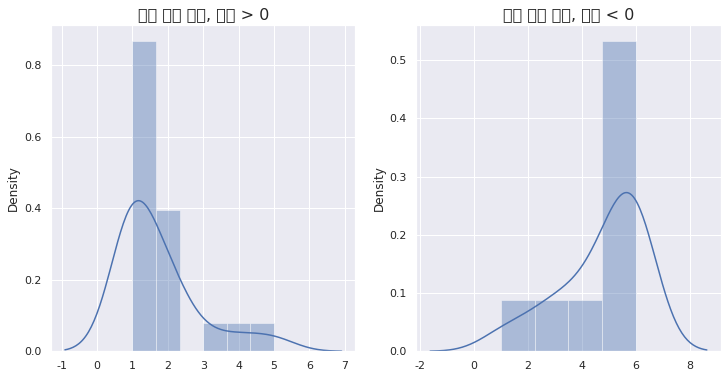

In [ ]:
# 왜도 시각화

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
dis_plot = sns.distplot(skew_list1)
plt.title("우쯕 꼬리 분포, 왜도 > 0", fontsize = 16)

plt.subplot(1,2,2)
dis_plot = sns.distplot(skew_list2)
plt.title("좌쯕 꼬리 분포, 왜도 < 0", fontsize = 16)
plt.show()

In [ ]:
# 첨도 산출
from scipy.stats import kurtosis

kur_list1 = [1,2,3,4,5,6,7,8,9,10]
kur_list2 = [1,2,3,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,7,8,9,10]

print(kurtosis(kur_list1))
print(kurtosis(kur_list2))

-1.2242424242424244
2.351887069895106


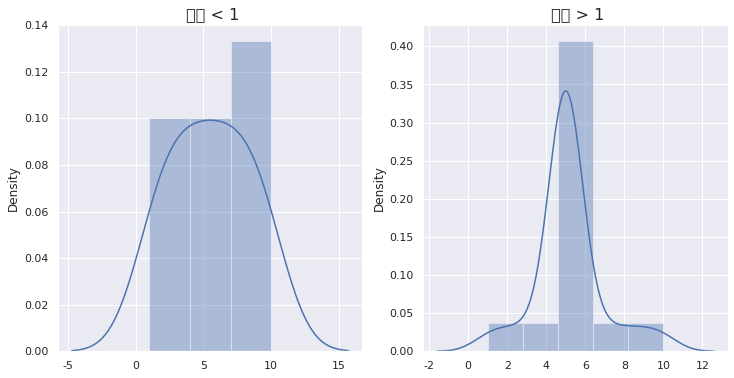

In [ ]:
# 첨도 시각화

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
dis_plot = sns.distplot(kur_list1)
plt.title(" 첨도 < 1", fontsize = 16)

plt.subplot(1,2,2)
dis_plot = sns.distplot(kur_list2)
plt.title(" 첨도 > 1", fontsize = 16)
plt.show()